# Support Vector Machines
## SVM - Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.
Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**


In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("J:/Data science/ML/Pyhon for ML/3.1 UNZIP_ME_FOR_NOTEBOOKS_V4/DATA/cement_slump.csv")

In [36]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<Axes: xlabel='Cement', ylabel='Compressive Strength (28-day)(Mpa)'>

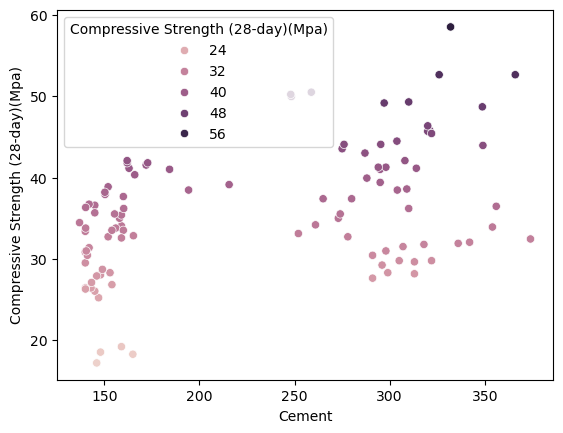

In [37]:
sns.scatterplot(data=df,x='Cement',y='Compressive Strength (28-day)(Mpa)',hue='Compressive Strength (28-day)(Mpa)')

In [38]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<Axes: >

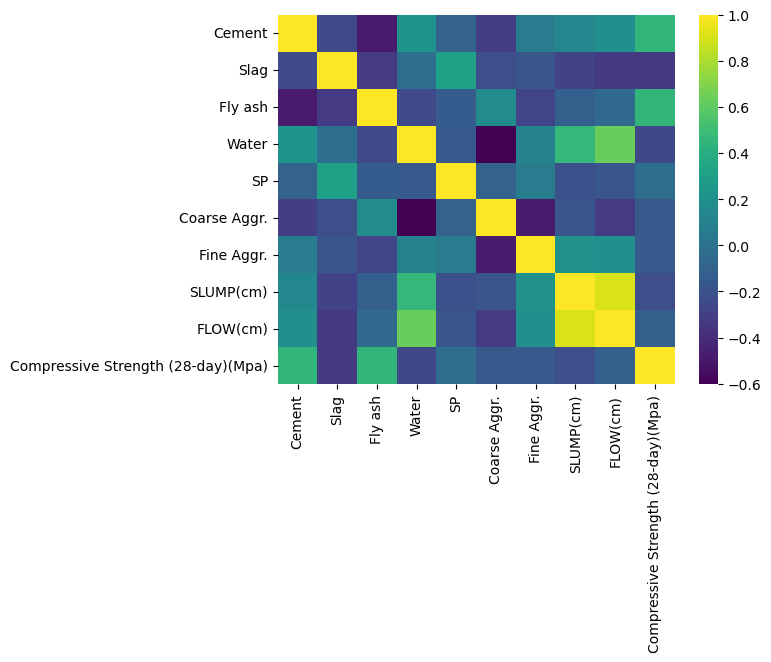

In [39]:
sns.heatmap(df.corr(),cmap='viridis')

In [40]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [41]:
x = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [46]:
from sklearn.svm import SVR,LinearSVR

In [47]:
svr_model = SVR()
svr_model.fit(scaled_x_train,y_train)

SVR()

In [48]:
y_pred = svr_model.predict(scaled_x_test)
y_pred

array([33.54538508, 36.88488329, 35.31862535, 34.4982983 , 38.78862684,
       37.28692733, 34.70488018, 37.45383093, 38.5643203 , 40.60987705,
       36.12704821, 33.47125341, 33.80688776, 35.57395401, 39.06389895,
       39.20405978, 38.73343751, 36.38267762, 32.54415537, 34.41850278,
       37.08595015, 35.95245982, 35.172924  , 32.85268464, 38.10884757,
       36.35378576, 34.496466  , 33.01047764, 36.06717968, 35.99982788,
       34.58986779])

In [49]:
x_test.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
37,165.0,150.0,0.0,182.0,12.0,1023.0,729.0,14.5,20.0
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0
69,336.0,134.0,0.0,222.0,6.0,756.0,787.0,26.0,64.0
80,140.1,4.2,215.9,193.9,4.7,1049.5,710.1,24.5,57.0
92,303.8,0.2,239.8,236.4,8.3,780.1,715.3,25.0,78.0


In [50]:
from sklearn.inspection import permutation_importance

Feature: 0, Score: 15.27995
Feature: 1, Score: 5.07729
Feature: 2, Score: 8.19617
Feature: 3, Score: 3.59390
Feature: 4, Score: 2.39191
Feature: 5, Score: 3.08373
Feature: 6, Score: 2.77212
Feature: 7, Score: 4.18919
Feature: 8, Score: 3.63410


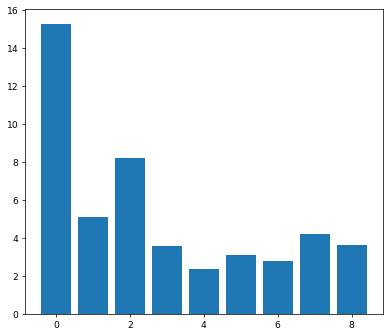

In [51]:
plt.figure(figsize=(7,6),dpi=66)
results = permutation_importance(svr_model, scaled_x_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

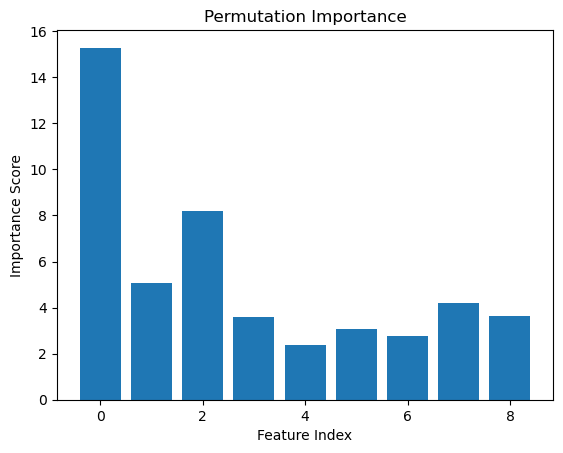

In [52]:
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Permutation Importance')
plt.show()

In [53]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

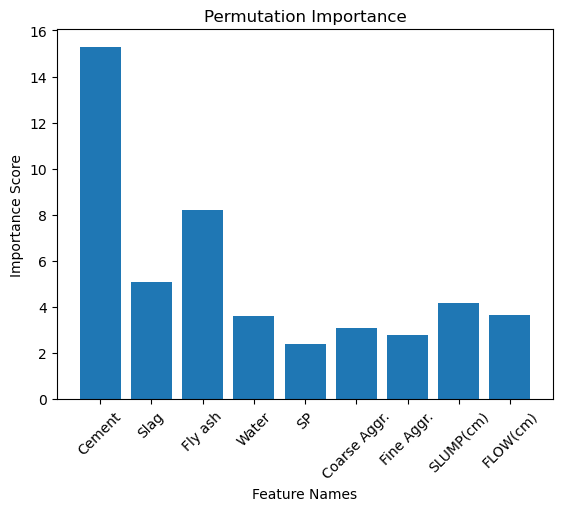

In [54]:
feature_names = ['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.','Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)']  
plt.bar(feature_names, importance)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Feature Names')
plt.ylabel('Importance Score')
plt.title('Permutation Importance')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
mse = np.sqrt(mean_squared_error(y_test,y_pred))
mse

6.695914838327133

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1,2,5],
              'kernel':['linear','poly','rbf'],
              'gamma':[0.001,0.01,0.1,0.5,1,2,5],
              'degree':[2,3,4,5]}

In [59]:
svr_grid = SVR()

In [60]:
grid_model = GridSearchCV(svr_grid,param_grid=param_grid)

In [61]:
grid_model.fit(scaled_x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5],
                         'degree': [2, 3, 4, 5],
                         'gamma': [0.001, 0.01, 0.1, 0.5, 1, 2, 5],
                         'kernel': ['linear', 'poly', 'rbf']})

In [62]:
print(grid_model.best_estimator_)
print(grid_model.best_params_)

SVR(C=0.5, degree=2, gamma=0.001, kernel='linear')
{'C': 0.5, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}


Conclusion:
Your best model is SVR(C=0.5, gamma=0.001, kernel='linear'), and the **degree=2 is just there because it was included in the search space but is ignored when using a linear kernel**.

In [63]:
ypred_grid = grid_model.predict(scaled_x_test)
ypred_grid

array([19.58812425, 37.15456772, 32.60628785, 31.28081585, 46.41711241,
       37.4161551 , 34.51657186, 39.60914603, 37.80670276, 48.97188921,
       34.82039592, 30.45772779, 28.70157214, 36.00509968, 43.25354004,
       46.49204331, 45.7177438 , 34.52012819, 30.57879741, 33.34663836,
       41.15208917, 36.58054952, 34.11193928, 30.88410286, 47.38799648,
       38.24842484, 31.08291756, 30.38271632, 36.9537292 , 31.79351864,
       31.62093466])

In [64]:
y_pred

array([33.54538508, 36.88488329, 35.31862535, 34.4982983 , 38.78862684,
       37.28692733, 34.70488018, 37.45383093, 38.5643203 , 40.60987705,
       36.12704821, 33.47125341, 33.80688776, 35.57395401, 39.06389895,
       39.20405978, 38.73343751, 36.38267762, 32.54415537, 34.41850278,
       37.08595015, 35.95245982, 35.172924  , 32.85268464, 38.10884757,
       36.35378576, 34.496466  , 33.01047764, 36.06717968, 35.99982788,
       34.58986779])

In [65]:
mse_grid = np.sqrt(mean_squared_error(y_test,ypred_grid))
mse_grid

3.7581590522984616